In [23]:
%pylab inline
import glob
import jvrip as jv

Populating the interactive namespace from numpy and matplotlib


In [24]:
file_list = glob.glob('data/*.txt')

In [41]:
def get_cells(file_list):
    cells =[]
    for item in file_list:
        p = jv.jvrip(item)
        item = item.split('/')[-1].split('.')[0]
        item = item.split('-')
        coords = [int(x) for x in item]
        
        p['x'] = coords[0]*(10/12.0)-(10/24.0)
        
        p['y'] = coords[1]
        
        cells.append(p)
        
    return cells

In [42]:
cells = get_cells(file_list)
cells[0]

{'Eff': 6.4529607929132169,
 'FF': 0.52293300238981744,
 'jsc': 18.909891095464982,
 'voc': 0.65256525652565256,
 'x': 4.583333333333333,
 'y': 11}

In [43]:
def org_data(data, key):
    fdata = []
    for cell in data:
        fdata.append([cell.get('x'), cell.get('y'), cell.get(key)])
        
    return fdata

In [53]:
bg = org_data(cells, 'Eff')
this = transpose(bg)
print this

print this[2]

[[  4.58333333   4.58333333   3.75         1.25         8.75         2.08333333
    5.41666667   7.08333333   7.91666667   2.91666667   1.25         3.75
    8.75         0.41666667   1.25         6.25         2.91666667
    7.91666667   6.25         5.41666667   1.25         2.08333333
    7.91666667   4.58333333   7.91666667   6.25         2.91666667
    4.58333333   2.08333333   2.08333333   2.91666667   2.08333333
    2.08333333   2.08333333   3.75         3.75         6.25         0.41666667
    7.91666667   7.08333333   1.25         7.08333333   0.41666667
    9.58333333   7.91666667   0.41666667   8.75         4.58333333   3.75
    3.75         5.41666667   9.58333333   6.25         9.58333333
    2.08333333   6.25         9.58333333   1.25         6.25         9.58333333
    5.41666667   0.41666667   4.58333333   2.08333333   0.41666667   3.75
    5.41666667   0.41666667   7.08333333   9.58333333   7.08333333
    4.58333333   2.08333333   7.08333333   7.91666667   0.41666667
  

In [49]:
data = transpose(array(this))

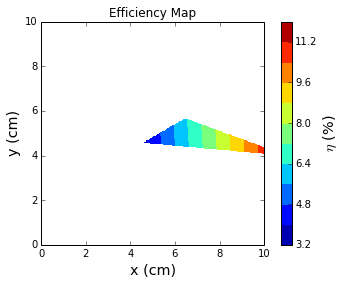

In [50]:
x = data[0]
y = data[1]
z = data[2]

xi = linspace(min(x), max(x), 100)
yi = linspace(min(y), max(y), 100)

fig = figure()
zi = griddata(x, y, z, xi, yi)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
s = ax.contourf(xi, yi, zi, 10)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
c = colorbar(s)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
c.set_label('$\eta$ (%)')
ax.set_title('Efficiency Map')



In [51]:
len(zi)

100

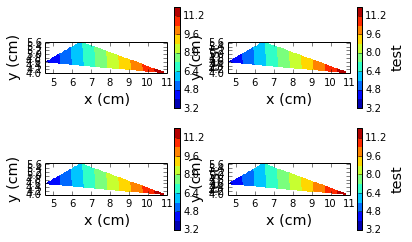

In [52]:
f, axes = subplots(2,2)

param = ['Eff', 'voc', 'jsc', 'FF']
flat = axes.ravel()


for ax, p in zip(flat, param):
    
    ax.set_aspect('equal')
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    s = ax.contourf(xi, yi, zi, 10)
    cb = colorbar(s,ax=ax)
    cb.set_label('test')
    
    
